In [7]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

import os
import joblib

In [8]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [9]:
seed=42


In [10]:
best_params={'n_neighbors': 1000, 
             'algorithm': 'brute', 
             'leaf_size': 458, 
             'metric': 'minkowski', 
             'p': 48, 
             'contamination': 0.019012254771883536, 
             'novelty': False}



In [11]:
PATH='OUTPUT/MODIFIED_TYPE_3'
all_files=os.listdir(PATH)
files=[]
for f in all_files:
    if f.endswith('csv'):
        files.append(f)
all_files=files
anomaly_type=3

In [ ]:
f1_scores = []
prec_scores=[]
recall_scores=[]
fold_scores=[]
for fi in all_files:
    building = pd.read_csv(PATH+'/'+fi)
    X_train=building['modified']
    y_train = building['labels'].values
    y_train=np.where(y_train==anomaly_type,1,0)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(pd.DataFrame(X_train))

    ind_best_f1=0
    for cont in range(2,6):
        cont/=100
        best_params['contamination']=cont
        model = LocalOutlierFactor( **best_params)
        y_pred=model.fit_predict(X_train)
        y_pred=np.where(y_pred==-1,1,0)

        score_f1=f1_score(y_train,y_pred, zero_division=0)

        if score_f1> ind_best_f1:
            score_prec=precision_score(y_train,y_pred, zero_division=0)
            score_recall=recall_score(y_train,y_pred, zero_division=0)
            ind_best_f1=score_f1
            ind_best_prec=score_prec
            ind_best_recall=score_recall
    f1_scores.append(ind_best_f1)
    prec_scores.append(ind_best_prec)
    recall_scores.append(ind_best_recall) 
    print(ind_best_f1,end="\t")

0.8975155279503106	0.8888888888888891	0.926605504587156	0.6925925925925925	0.9359430604982206	0.7864077669902912	0.8417266187050361	0.28018679119412937	0.9036885245901639	0.9233082706766917	0.774869109947644	0.962962962962963	0.9373776908023483	0.978723404255319	0.9887323943661972	0.974169741697417	0.8875912408759123	0.6402486402486403	0.9191919191919192	0.9259259259259259	0.9232323232323232	0.9264264264264264	0.9795539033457249	0.9105839416058393	0.9315436241610738	0.9873417721518987	0.6642066420664207	0.5440729483282675	0.99203187250996	0.510556621880998	0.8602442333785617	0.9229422066549913	0	0.9391891891891893	0.8617363344051446	0.8886554621848739	0.7261324041811847	0.12507977026164646	0.8897576231430805	0.6934306569343066	0.011816838995568684	0.9105839416058393	0.9332146037399822	0.6296296296296297	0.6370716510903428	0.8914956011730204	0.9467541940189642	0.8252911813643927	0.9347536617842875	0.9176470588235294	0.8738317757009346	0.8801261829652997	0.7197802197802199	0.973647711511

In [ ]:
print(np.mean(f1_scores))

0.8189146757501379


In [ ]:
print(np.mean(prec_scores))

0.9076350919786381


In [ ]:
print(np.mean(recall_scores))

0.9069843316930485


In [ ]:
import matplotlib.pyplot as plt


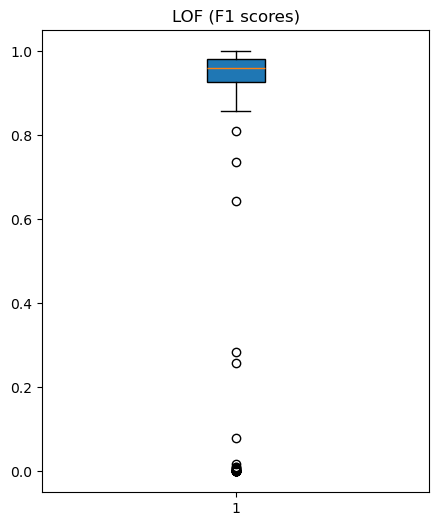

In [ ]:
fig,ax=plt.subplots(figsize=(5,6))
ax.boxplot(f1_scores,patch_artist = True,
                notch =False, vert = 0)
ax.set_title("LOF (F1 scores)")
fig.savefig(f"type_{anomaly_type}_LOF.png")

In [ ]:
f1_score_dict={}
for idx,fi in enumerate(all_files):
    bid=int(fi.split("_")[0])
    f=f1_scores[idx]
    f1_score_dict[bid]=f

In [ ]:
joblib.dump(f1_score_dict,f"OUTPUT/SCORES/LOF_type_{anomaly_type}_f1_scores.pkl")

['OUTPUT/SCORES/LOF_type_3_f1_scores.pkl']